# Rough

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
# Set global font properties
fontsize = 22
plt.rcParams['figure.figsize'] = [10, 10]

plt.rcParams['font.size'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = fontsize - 3

plt.rcParams['font.family'] = 'Monospace'
plt.rcParams['font.style'] = 'normal'

In [2]:
names = ["BAMultiShapes", "MUTAG", "Mutagenicity", "NCI1"]
sizes = [0.05, 0.25, 0.50, 0.75, 1.00]

# Accuracy vs Size

In [3]:
means_BAMultiShapes_fable = [0.802, 0.845, 0.868, 0.867, 0.867]
stds_BAMultiShapes_fable  = [0.042, 0.006, 0.009, 0.006, 0.004]

means_MUTAG_fable = [0.605, 0.781, 0.763, 0.790, 0.833]
stds_MUTAG_fable =  [0.162, 0.016, 0.049, 0.097, 0.076]

means_Mutagenicity_fable = [0.688, 0.716, 0.735, 0.724, 0.718]
stds_Mutagenicity_fable =  [0.044, 0.014, 0.013, 0.010, 0.028]

means_NCI1_fable = [0.658, 0.683, 0.706, 0.711, 0.702]
stds_NCI1_fable =  [0.047, 0.008, 0.010, 0.009, 0.028]

In [4]:


means_BAMultiShapes_glg = [0.613, 0.429,	0.489,	0.515,	0.51]
stds_BAMultiShapes_glg =  [0.026, 0.134,	0.069,	0.044,	0.034]

means_MUTAG_glg = [0.614, 0.667,	0.649,	0.667,	0.737]
stds_MUTAG_glg =  [0.185, 0.089,	0.152,	0.106,	0.077]

means_Mutagenicity_glg = [0.496, 0.606,	0.609,	0.634,	0.623]
stds_Mutagenicity_glg =  [0.049, 0.033,	0.05,	0.027,	0.019]

means_NCI1_glg = [0.526, 0.58,	0.603,	0.623,	0.567]
stds_NCI1_glg =  [0.038, 0.015,	0.032,	0.013,	0.036]

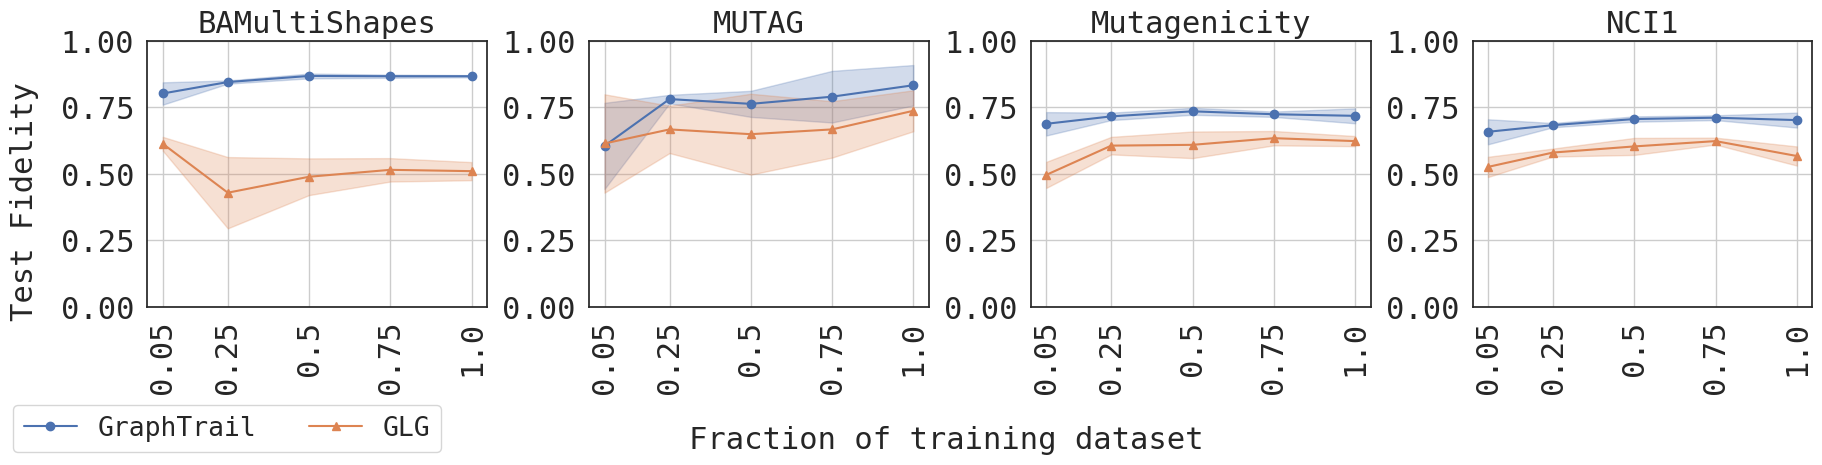

In [6]:
colors = ["#4C72B0", "#DD8452"]
fig, axs = plt.subplots(1,4, figsize=(18,4.5), sharex=True)
axes_list = []
markers = ["o", "^"]
for i, dataset in enumerate(names):
    for j, method in enumerate(["fable", "glg"]):
        means = eval(f"means_{dataset}_{method}")
        stds = eval(f"stds_{dataset}_{method}")
        x, = axs[i].plot(
            sizes,
            means,
            marker=markers[j],
            label=method.upper(),
            color=colors[j],
        )
        axes_list.append(x)
        axs[i].fill_between(
            sizes,
            y1=[m - s for m, s in zip(means, stds)],
            y2=[m + s for m, s in zip(means, stds)],
            alpha=0.25,
            color=colors[j],
        )
        axs[i].set_title(dataset, fontdict=dict(size=fontsize))
        axs[i].set_xticks(sizes)
        axs[i].set_xticklabels(sizes, rotation=90)

        axs[i].set_ylim(0,1)

        axs[i].grid(True)

fig.legend(axes_list, ['GraphTrail', 'GLG'], loc='lower left', ncols=2)
fig.text(0.5, -0.05, "Fraction of training dataset", ha='center', fontdict=dict(size=fontsize))
fig.text(-0.02, 0.5, "Test Fidelity", va='center', rotation='vertical', fontdict=dict(size=fontsize))
fig.tight_layout()
fig.savefig("acc_vs_size.pdf", bbox_inches="tight")